# Travaux pratiques sur les réseaux d'eau

## 0. Données et fonctions du problème

### On charge dans l'environnement :
1. les fonctions de Python qui seront utilisées,
2. les données du problème,
3. les fonctions utilitaires du problème.

In [3]:
from numpy import random
import numpy as np

In [4]:
from Probleme_R import *
from Structures_N import *

In [5]:
from Visualg import Visualg
from Verification import Verification

###  On charge les prototypes d'algorithmes d'optimisation :

* **Gradient_F** : algorithme de gradient à pas fixe,
* **Newton_F** : algorithme de Newton à pas fixe.

 **Algorithm 9.2: Backtracking line search.**  
given a descent direction $ \Delta x$ for $f$ at $x \in \operatorname{dom}f$, $\alpha \in(0,0.5)$, $\beta \in (0,1)$, $t:=1$.  
while $ f(x+t \Delta x)>f(x)+\alpha t \nabla f(x)^{T} \Delta x $:  
  $ t:=\beta t $

In [6]:
def BacktrackingLineSearch(qc,critere,gradient,delta_x,
                           alpha = 0.1, beta = 0.9):
    step = 0.0006
    qc_new = qc + step * delta_x
    q = q0 + B.dot (qc_new)
    critere_new = 1/3*q.dot(r*q*abs(q)) + pr.dot(Ar.dot(q))
    while critere_new > critere + alpha * step * gradient.transpose()@delta_x:
        step *= beta
    return step

In [35]:
def Gradient_F(Oracle, x0, alpha0):
    
    from numpy.linalg import norm
    from time import process_time
    
    ##### Initialisation des variables
    
    iter_max = 10000
    gradient_step = alpha0
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []

    critere_list = []
    
    time_start = process_time()
    
    x = x0

    ##### Boucle sur les iterations

    for k in range(iter_max):
        
        # Valeur du critere et du gradient
        critere, gradient = Oracle(x)
        
        # Test de convergence
        gradient_norm = norm(gradient)
        if gradient_norm <= threshold:
            break

        # Direction de descente
        direction = -gradient
        
        # Backracking Line search for step size
        #gradient_step = BacktrackingLineSearch(x,critere,gradient,direction)
        
        # Mise a jour des variables
        x = x + (gradient_step*direction)
        
        # Evolution du gradient, du pas, et du critere
        gradient_norm_list.append(gradient_norm)
        gradient_step_list.append(gradient_step)

        
        critere_list.append(critere)
    
    ##### Resultats de l'optimisation

    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start
    
    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))

    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt

In [36]:
def Newton_F(Oracle, x0, alpha0):
    
    from numpy.linalg import norm
    from numpy.linalg import solve
    from time import process_time
    
    ##### Initialisation des variables    
    
    iter_max = 100
    gradient_step = alpha0
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []

    time_start = process_time()
    
    x = x0

    ##### Boucle sur les iterations
    
    for k in range(iter_max):
        
        # Valeur du critere et du gradient
        critere, gradient, hessien = Oracle(x)

        # Test de convergence
        gradient_norm = norm(gradient)
        if gradient_norm <= threshold:
            break
        
        # Direction de descente
        direction = - solve(hessien, gradient)
        
        # Mise a jour des variables
        x = x + (gradient_step*direction)
        
        # Evolution du gradient, du pas, et du critere
        gradient_norm_list.append(gradient_norm)
        gradient_step_list.append(gradient_step)
        critere_list.append(critere)
   
    ##### Resultats de l'optimisation
    
    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
    
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt

## I. Résolution du problème primal

In [37]:
from HydrauliqueP import HydrauliqueP

### I.a On écrit les oracles pour le problème primal d'optimisation :

* **OraclePG** : calcul de la fonction et du gradient,
* **OraclePH** : calcul de la fonction du gradient et du Hessien.

$ q=q^{(0)}+B q_{c} $  
  
$ z=r \bullet q \bullet|q| $
  
$ \nabla F\left(q_{C}\right)=B^{\top}(r \bullet q \bullet|q|)+B^{\top} A_{r}^{\top} p_{r} $  

$ F\left(q_{C}\right) = \frac{1}{3}\langle q, r \bullet q \bullet|q|\rangle+\left\langle p_{r}, A_{r} q\right\rangle $


In [38]:
def OraclePG(qc):
    
    gradient =B.transpose()@(r*(q0+B@qc)*abs(q0+B@qc))+B.transpose()@Ar.transpose()@pr
    critere = dot(q0+B@qc, r*(q0+B@qc)*abs(q0+B@qc))/3 + dot(pr, Ar@(q0+B@qc))
    
    return critere, gradient

$ \nabla^{2} F\left(q_{c}\right)=2B^{T} \operatorname{diag}(\mathrm{r} \cdot|q| ) \mathrm{B} $

In [39]:
def OraclePH(qc):
    q = q0 + B@qc 
    M =2 * np.diag(r * abs(q))
    temp = B.T.dot(M)
    hessien = temp.dot(B)
    critere, gradient= OraclePG(qc)
    # ---> A COMPLETER
    # ---> A COMPLETER
    
    return critere, gradient, hessien

### On teste la validité des oracles en résolvant le problème :

* **OraclePG** avec la méthode du gradient à pas fixe,
* **OraclePH** avec la méthode de Newton à pas fixe


MINIMISATION DU PROBLEME PRIMAL

ALGORITHME DU GRADIENT A PAS FIXE

Iteration : 4068
Temps CPU : 0.15625
Critere optimal : -3.734007048043509
Norme du gradient : 9.984596957958875e-07


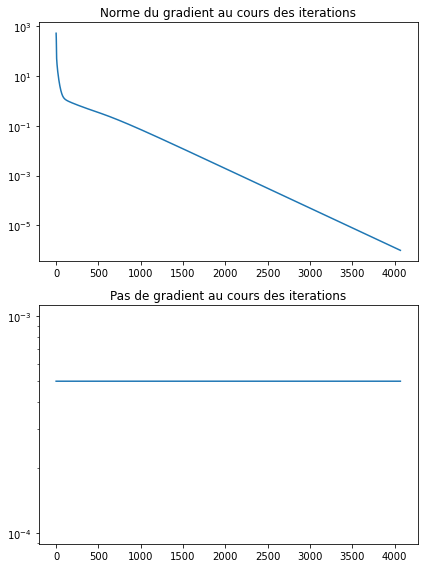


Verification des equations d'equilibre du reseau
Sur les debits : 5.551115123125783e-17
Sur les pressions : 9.98454529388404e-07


In [40]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DU GRADIENT A PAS FIXE")
copt, gopt, xopt = Gradient_F(OraclePG, x0, 0.0005)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)


MINIMISATION DU PROBLEME PRIMAL

ALGORITHME DE NEWTON A PAS FIXE

Iteration : 5
Temps CPU : 0.0
Critere optimal : -3.734007048043569
Norme du gradient : 3.570221333626481e-07


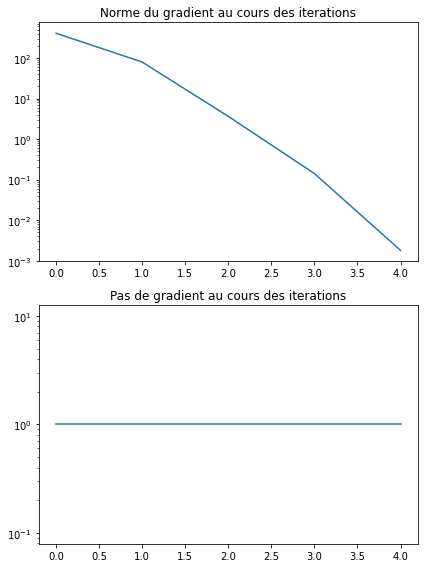


Verification des equations d'equilibre du reseau
Sur les debits : 1.1102230246251565e-16
Sur les pressions : 3.3959827169804946e-07


In [41]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DE NEWTON A PAS FIXE")
copt, gopt, xopt = Newton_F(OraclePH, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

### I.b On écrit l'algorithme de recherche linéaire (conditions de Wolfe).

In [42]:
def Wolfe(alpha, x, D, Oracle):
    
    from numpy import dot
    from numpy import inf
    from numpy.linalg import norm

    ##### Coefficients de la recherche lineaire
    
    omega_1 = 0.1
    omega_2 = 0.9
    
    alpha_min = 0
    alpha_max = inf
    
    ok = 0
    dltx = 0.00000001

    ##### Algorithme de Fletcher-Lemarechal
    
    # Appel de l'oracle au point initial
    argout = Oracle(x)
    critere = argout[0]
    gradient = argout[1]
    
    # Initialisation de l'algorithme
    alpha_n = alpha
    xn = x
    
    # Boucle de calcul du pas
    # xn represente le point pour la valeur courante du pas,
    # xp represente le point pour la valeur precedente du pas.
    while ok == 0:
        
        # Point precedent pour tester l'indistinguabilite
        xp = xn
        
        # Point actuel
        xn = x + alpha_n*D
        
        # Calcul des conditions de Wolfe
        #
        # ---> A COMPLETER
        # ---> A COMPLETER
        
        # Test des conditions de Wolfe
        #
        # - Si les deux conditions de Wolfe sont verifiees,
        #   poser ok = 1 : on sort alors de la boucle while
        # - Sinon, modifier la valeur de alphan et reboucler
        #
        # ---> A COMPLETER
        # ---> A COMPLETER
        
        # Test d'indistinguabilite
        if norm(xn - xp) < dltx:
            ok = 2

    return alpha_n, ok

### I.c On écrit l'algorithme du gradient à pas variable et on le teste

In [ ]:
def Gradient_V(Oracle, x0, alpha0):
    
    from numpy.linalg import norm
    from time import process_time
    
    ##### Initialisation des variables

    iter_max = 1000
    default_gradient_step = alpha0
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []
    
    time_start = process_time()

    x = x0

    ##### Boucle sur les iterations

    for k in range(iter_max):
        
        # ---> A COMPLETER
        # ---> A COMPLETER
    
    ##### Resultats de l'optimisation
    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
    
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt

In [ ]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DU GRADIENT A PAS VARIABLE")
copt, gopt, xopt = Gradient_V(OraclePG, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

### I.d On écrit l'algorithme de gradient conjugué (Polak-Ribière) et on le teste

In [ ]:
def PolakRibiere(Oracle, x0, alpha0):
    
    from numpy import dot
    from numpy.linalg import norm
    from time import process_time
    
    ##### Initialisation des variables

    iter_max = 1000
    default_gradient_step = alpha0
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []
    
    time_start = process_time()

    x = x0
    
    ##### Boucle sur les iterations
    
    for k in range(iter_max):
        
        # ---> A COMPLETER
        # ---> A COMPLETER
        #
        # Attention a l'initialisation de l'algorithme !
    
    # Resultat de l'optimisation
    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
        
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt

In [ ]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DU GRADIENT CONJUGUE")
copt, gopt, xopt = PolakRibiere(OraclePG, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

### I.e On écrit l'algorithme de quasi-Newton (BFGS) et on le teste

In [ ]:
def BFGS(Oracle, x0, alpha0):
    
    from numpy import dot
    from numpy import eye
    from numpy import outer
    from numpy import vdot
    from numpy.linalg import norm
    from time import process_time
    
    ##### Initialisation des variables

    iter_max = 250
    default_gradient_step = alpha0
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []
    
    time_start = process_time()

    x = x0

    ##### Boucle sur les iterations
    
    for k in range(iter_max):
        
        # ---> A COMPLETER
        # ---> A COMPLETER
        #
        # Attention a l'initialisation de l'algorithme !
    
    # Resultat de l'optimisation
    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
        
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt

In [ ]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DE QUASI-NEWTON")
copt, gopt, xopt = BFGS(OraclePG, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

### I.f On écrit l'algorithme de Newton à pas variable et on le teste

In [ ]:
def Newton_V(Oracle, x0, alpha0):
    
    from numpy.linalg import norm
    from numpy.linalg import solve
    from time import process_time
    
    ##### Initialisation des variables  
    
    iter_max = 100
    default_gradient_step = alpha0
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []

    time_start = process_time()
    
    x = x0

    ##### Boucle sur les iterations
    
    for k in range(iter_max):
        
        # ---> A COMPLETER
        # ---> A COMPLETER
           
    ##### Resultats de l'optimisation
    
    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
    
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt

In [ ]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL")
print()
print("ALGORITHME DE NEWTON A PAS VARIABLE")
copt, gopt, xopt = Newton_V(OraclePH, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

## II. Résolution du problème dual

In [ ]:
from HydrauliqueD import HydrauliqueD

### II.a On écrit les oracles pour le problème dual d'optimisation :

* **OracleDG** : calcul de la fonction et du gradient,
* **OracleDH** : calcul de la fonction du gradient et du Hessien.

In [ ]:
def OracleDG(pd):
    
    # ---> A COMPLETER
    # ---> A COMPLETER
    
    return critere, gradient

In [ ]:
def OracleDH(pd):
    
    # ---> A COMPLETER
    # ---> A COMPLETER
    
    return critere, gradient, hessien

### II.b On exécute tous les algorithmes d'optimisation déjà écrits

In [ ]:
x0 = 100 + random.normal(size=md)
print()
print("MINIMISATION DU PROBLEME DUAL")
print()
print("ALGORITHME DU GRADIENT A PAS VARIABLE")
copt, gopt, xopt = Gradient_V(OracleDG, x0, 5)
qopt, zopt, fopt, popt = HydrauliqueD(xopt, m, mr, r, pr, fd, A, Ar)
Verification(A, qopt, zopt, fopt, popt)

In [ ]:
x0 = 100 + random.normal(size=md)
print()
print("MINIMISATION DU PROBLEME DUAL")
print()
print("ALGORITHME DU GRADIENT CONJUGUE")
copt, gopt, xopt = PolakRibiere(OracleDG, x0, 5)
qopt, zopt, fopt, popt = HydrauliqueD(xopt, m, mr, r, pr, fd, A, Ar)
Verification(A, qopt, zopt, fopt, popt)

In [ ]:
x0 = 100 + random.normal(size=md)
print()
print("MINIMISATION DU PROBLEME DUAL")
print()
print("ALGORITHME DE QUASI-NEWTON")
copt, gopt, xopt = BFGS(OracleDG, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueD(xopt, m, mr, r, pr, fd, A, Ar)
Verification(A, qopt, zopt, fopt, popt)

In [ ]:
x0 = 100 + random.normal(size=md)
print()
print("MINIMISATION DU PROBLEME DUAL")
print()
print("ALGORITHME DE NEWTON A PAS VARIABLE")
copt, gopt, xopt = Newton_V(OracleDH, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueD(xopt, m, mr, r, pr, fd, A, Ar)
Verification(A, qopt, zopt, fopt, popt)

## III. Résolution de grands réseaux (facultatif)

### On charge dans l'environnement les données du problème

Ces données correspondent à un réseau de taille paramétrable.

In [ ]:
from Probleme_P import *
from Structures_S import *

### III.a On écrit des oracles primal et dual avec Hessien creux

In [ ]:
def OraclePHS(qc):
    
    # ---> A COMPLETER
    # ---> A COMPLETER
    
    return critere, gradient, hessien

In [ ]:
def OracleDHS(pd):
    
    # ---> A COMPLETER
    # ---> A COMPLETER
    
    return critere, gradient, hessien

### III.b On écrit un algorithme de Newton exploitant le creux

In [ ]:
def Newton_S(Oracle, x0, alpha0):
    
    from numpy.linalg import norm
    from scipy.sparse.linalg import spsolve
    from time import process_time
    
    ##### Initialisation des variables  
    
    iter_max = 100
    default_gradient_step = alpha0
    threshold = 0.000001
    
    gradient_norm_list = []
    gradient_step_list = []
    critere_list = []

    time_start = process_time()
    
    x = x0

    ##### Boucle sur les iterations
    
    for k in range(iter_max):
        
        # ---> A COMPLETER
        # ---> A COMPLETER
           
    ##### Resultats de l'optimisation
    
    critere_opt = critere
    gradient_opt = gradient
    x_opt = x
    time_cpu = process_time() - time_start

    print()
    print('Iteration :', k)
    print('Temps CPU :', time_cpu)
    print('Critere optimal :', critere_opt)
    print('Norme du gradient :', norm(gradient_opt))
    
    # Visualisation de la convergence
    Visualg(gradient_norm_list, gradient_step_list, critere_list)
    
    return critere_opt, gradient_opt, x_opt

### III.c On résoud le problème dans le primal et dans le dual

In [ ]:
x0 = 0.1 * random.normal(size=n-md)
print()
print("MINIMISATION DU PROBLEME PRIMAL DE GRANDE TAILLE")
print()
print("ALGORITHME DE NEWTON A PAS VARIABLE")
copt, gopt, xopt = Newton_S(OraclePHS, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueP(xopt, m, mr, md, r, pr, fd, Ar, AdI, B, q0)
Verification(A, qopt, zopt, fopt, popt)

In [ ]:
x0 = 100 + random.normal(size=md)
print()
print("MINIMISATION DU PROBLEME DUAL DE GRANDE TAILLE")
print()
print("ALGORITHME DE NEWTON A PAS VARIABLE")
copt, gopt, xopt = Newton_S(OracleDHS, x0, 1)
qopt, zopt, fopt, popt = HydrauliqueD(xopt, m, mr, r, pr, fd, A, Ar)
Verification(A, qopt, zopt, fopt, popt)